# Women catching up

> Ideas & Links

> New York Times, History : http://nyti.ms/2vaTpYi || New York Times, Interactives "Six charts": http://nyti.ms/2hkPfKz || NYC Marathons, Statistics Analytics: http://bit.ly/1tpapUj

In [196]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as pyplot

In [202]:
df_marathon_ny = pd.read_csv("NY_Marathon_clean.csv")
df_marathon_ny.head(10)

,date,m_winner,m_country,m_time,f_winner,f_country,f_time,m_starter,f_starter,total_starter,m_finisher,f_finisher,total_finisher
0,1970,Gary Muhrcke,(USA),02:31:39,---[22],NaN,NaN,126.0,1.0,127.0,55.0,0.0,55.0
1,1971,Norm Higgins,(USA),02:22:54,Beth Bonner,(USA),02:55:22,240.0,5.0,245.0,153.0,4.0,157.0
2,1972,Sheldon Karlin,(USA),02:27:52,Nina Kuscsik,(USA),03:08:41,278.0,6.0,284.0,92.0,2.0,94.0
3,1973,Tom Fleming,(USA),02:21:55,Nina Kuscsik,(USA),02:57:08,394.0,12.0,406.0,277.0,5.0,282.0
4,1974,Norbert Sander,(USA),02:26:31,Kathrine Switzer,(USA),03:07:29,501.0,26.0,527.0,250.0,9.0,259.0
5,1975,Tom Fleming,(USA),02:19:27,Kim Merritt,(USA),02:46:14,490.0,44.0,534.0,303.0,36.0,339.0
6,1976,Bill Rodgers,(USA),02:10:09,Miki Gorman,(USA),02:39:11,2002.0,88.0,2090.0,1486.0,63.0,1549.0
7,1977,Bill Rodgers,(USA),02:11:20,Miki Gorman,(USA),02:43:10,4595.0,228.0,4823.0,3522.0,179.0,3701.0
8,1978,Bill Rodgers,(USA),02:12:12,Grete Waitz,(NOR),02:32:30,8937.0,938.0,9875.0,7819.0,769.0,8588.0
9,1979,Bill Rodgers,(USA),02:11:42,Grete Waitz,(NOR),02:27:33,10207.0,1326.0,11533.0,9274.0,1203.0,10477.0


In [203]:
df_marathon_ny.index

RangeIndex(start=0, stop=46, step=1)

In [204]:
df_marathon_ny = df_marathon_ny.set_index('date')
df_marathon_ny.head()

,m_winner,m_country,m_time,f_winner,f_country,f_time,m_starter,f_starter,total_starter,m_finisher,f_finisher,total_finisher
date,,,,,,,,,,,,
1970,Gary Muhrcke,(USA),02:31:39,---[22],NaN,NaN,126.0,1.0,127.0,55.0,0.0,55.0
1971,Norm Higgins,(USA),02:22:54,Beth Bonner,(USA),02:55:22,240.0,5.0,245.0,153.0,4.0,157.0
1972,Sheldon Karlin,(USA),02:27:52,Nina Kuscsik,(USA),03:08:41,278.0,6.0,284.0,92.0,2.0,94.0
1973,Tom Fleming,(USA),02:21:55,Nina Kuscsik,(USA),02:57:08,394.0,12.0,406.0,277.0,5.0,282.0
1974,Norbert Sander,(USA),02:26:31,Kathrine Switzer,(USA),03:07:29,501.0,26.0,527.0,250.0,9.0,259.0


In [205]:
df_marathon_ny.tail()

,m_winner,m_country,m_time,f_winner,f_country,f_time,m_starter,f_starter,total_starter,m_finisher,f_finisher,total_finisher
date,,,,,,,,,,,,
2011,Geoffrey Kiprono Mutai,(KEN),02:05:06,Firehiwot Dado,(ETH),02:23:15,30200.0,17563.0,47763.0,30068.0,17272.0,47340.0
2013,Geoffrey Kiprono Mutai,(KEN),02:08:24,Priscah Jeptoo,(KEN),02:25:07,31002.0,19738.0,50740.0,30699.0,19567.0,50266.0
2014,Wilson Kipsang,(KEN),02:10:59,Mary Keitany,(KEN),02:25:07,30324.0,20572.0,50896.0,30108.0,20422.0,50530.0
2015,Stanley Kipleting Biwott,(KEN),02:10:34,Mary Keitany,(KEN),02:24:25,29291.0,20944.0,50235.0,28899.0,20696.0,49595.0
2016,Ghirmay Ghebreslassie,(ERI),02:07:51,Mary Keitany,(KEN),02:24:26,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
df_marathon_ny.dtypes

m_winner           object
m_country          object
m_time             object
f_winner           object
f_country          object
f_time             object
m_starter         float64
f_starter         float64
total_starter     float64
m_finisher        float64
f_finisher        float64
total_finisher    float64
dtype: object

# Part 1 – Starters 

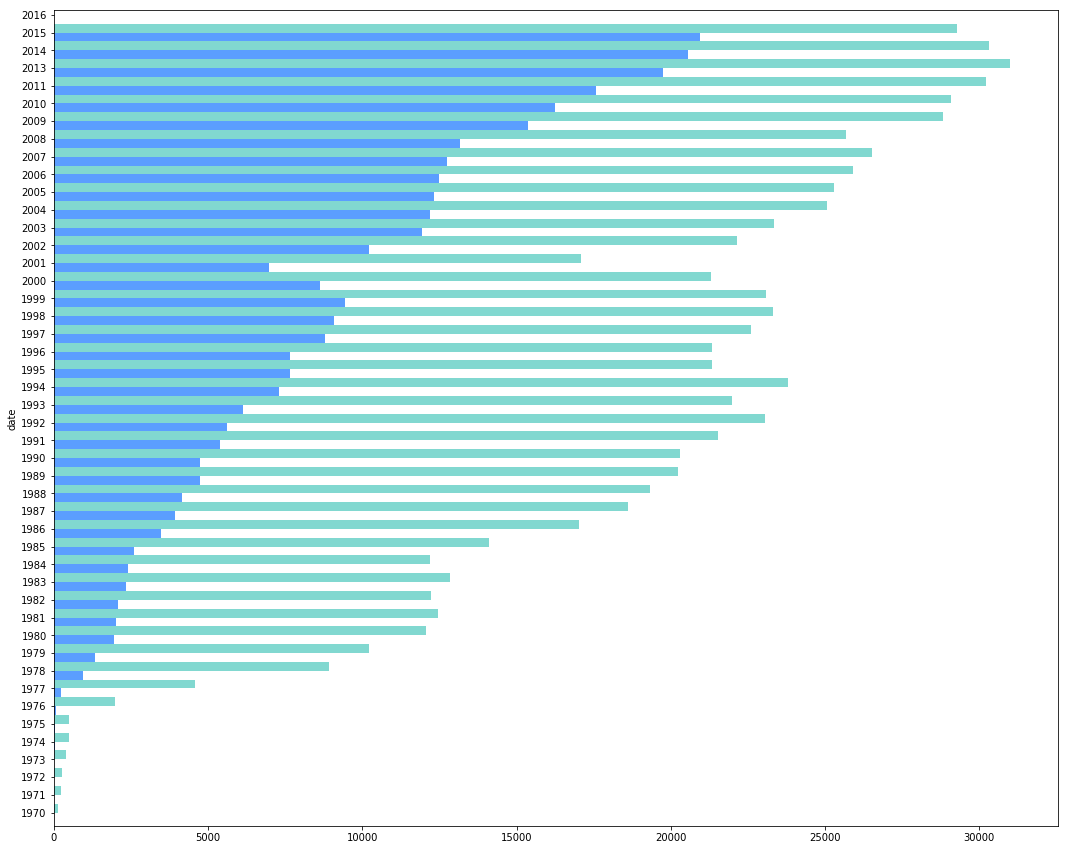

In [187]:
fig, ax = plt.subplots()

df_marathon_ny['m_starter'].plot(color='#81D8D0', ax=ax, position=0, kind='barh', figsize=(18,15), label='men starter')
df_marathon_ny['f_starter'].plot(color='#5B9EFF', ax=ax, position=1, kind='barh', figsize=(18,15), label='women starter')
#plt.ylabel('US dollars/capita, 1996–2016', fontsize=10)
#plt.xlabel('Year', fontsize=10)

#plt.savefig("marathon_graph_starters.pdf")

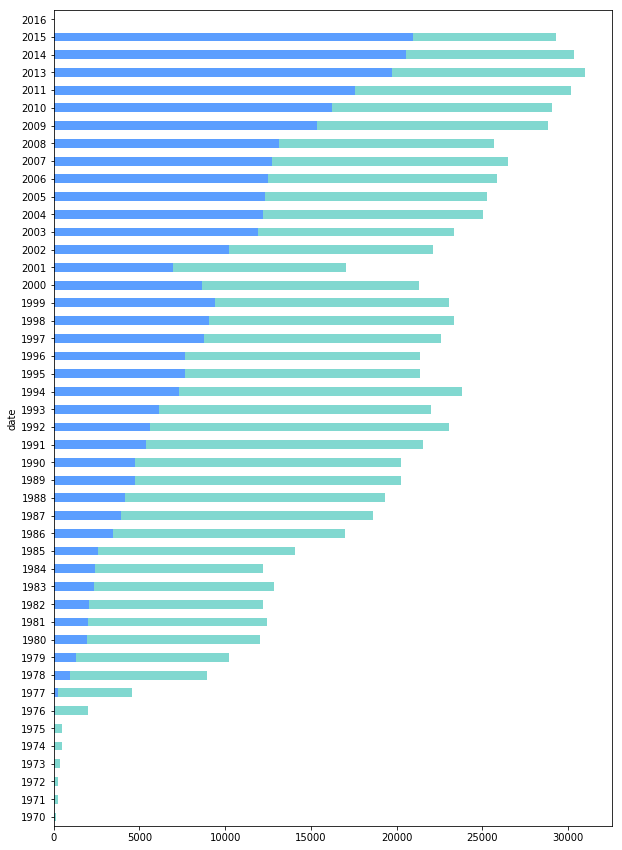

In [189]:
fig, ax = plt.subplots()

df_marathon_ny['m_starter'].plot(color='#81D8D0', ax=ax, kind='barh', figsize=(10,15), label='men starter')
df_marathon_ny['f_starter'].plot(color='#5B9EFF', ax=ax, kind='barh', figsize=(10,15), label='women starter')
#plt.ylabel('US dollars/capita, 1996–2016', fontsize=10)
#plt.xlabel('Year', fontsize=10)

#plt.savefig("marathon_graph_starters.pdf")

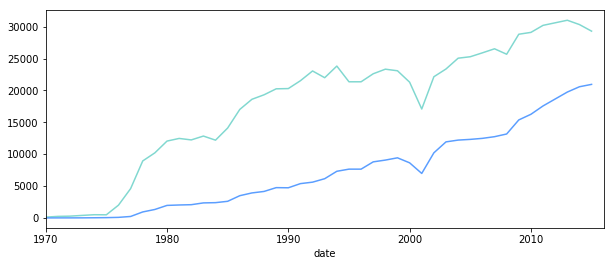

In [190]:
fig, ax = plt.subplots()

df_marathon_ny['m_starter'].plot(color='#81D8D0', ax=ax, figsize=(10,4), label='men starter')
df_marathon_ny['f_starter'].plot(color='#5B9EFF', ax=ax, figsize=(10,4), label='women starter')
#plt.ylabel('US dollars/capita, 1996–2016', fontsize=10)
#plt.xlabel('Year', fontsize=10)

#plt.savefig("marathon_graph_starters.pdf")

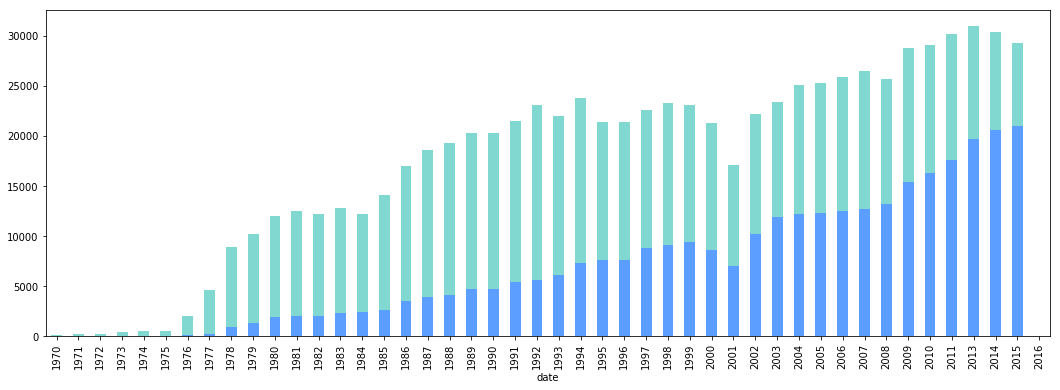

In [192]:
fig, ax = plt.subplots()

df_marathon_ny['m_starter'].plot(color='#81D8D0', ax=ax, kind='bar', figsize=(18,6), label='men starter')
df_marathon_ny['f_starter'].plot(color='#5B9EFF', ax=ax, kind='bar', figsize=(18,6), label='women starter')
#plt.ylabel('US dollars/capita, 1996–2016', fontsize=10)
#plt.xlabel('Year', fontsize=10)

#plt.savefig("marathon_graph_2.pdf")

# Part 2 – Countries

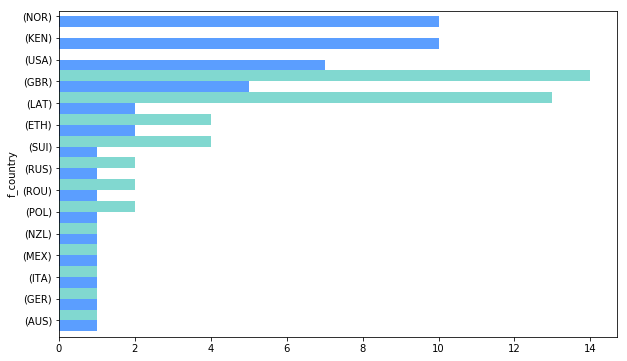

In [13]:
#MEN and WOMEN | total per Country
fig, ax = plt.subplots()
df_marathon_ny.groupby('m_country')['m_winner'].count().sort_values(ascending=True).plot(color='#81D8D0', figsize=(10,6), kind='barh', ax=ax, position=0)
df_marathon_ny.groupby('f_country')['f_winner'].count().sort_values(ascending=True).plot(color='#5B9EFF', figsize=(10,6), kind='barh', ax=ax, position=1)
#plt.savefig("marathon_graph_countries.pdf")

In [14]:
#MEN | Winner | Countries
df_marathon_ny.groupby('m_country')['m_winner'].count().sort_values(ascending=False)

m_country
(USA)    14
(KEN)    13
(MEX)     4
(ITA)     4
(RSA)     2
(ETH)     2
(BRA)     2
(TAN)     1
(NZL)     1
(MAR)     1
(GBR)     1
(ERI)     1
Name: m_winner, dtype: int64

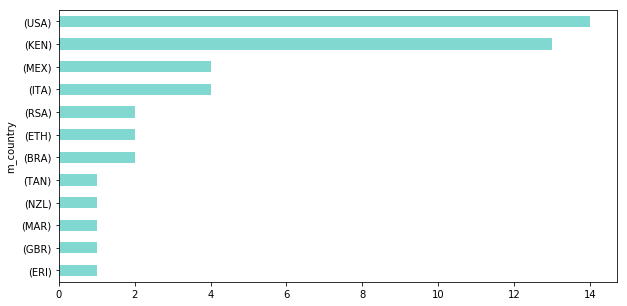

In [15]:
#MEN / per Countries / total Winners
df_marathon_ny.groupby('m_country')['m_winner'].count().sort_values(ascending=True).plot(color='#81D8D0', figsize=(10,5), kind='barh')

In [16]:
#WOMEN / Winner  / Countries
df_marathon_ny.groupby('f_country')['f_winner'].count().sort_values(ascending=False)

f_country
(NOR)    10
(KEN)    10
(USA)     7
(GBR)     5
(LAT)     2
(ETH)     2
(SUI)     1
(RUS)     1
(ROU)     1
(POL)     1
(NZL)     1
(MEX)     1
(ITA)     1
(GER)     1
(AUS)     1
Name: f_winner, dtype: int64

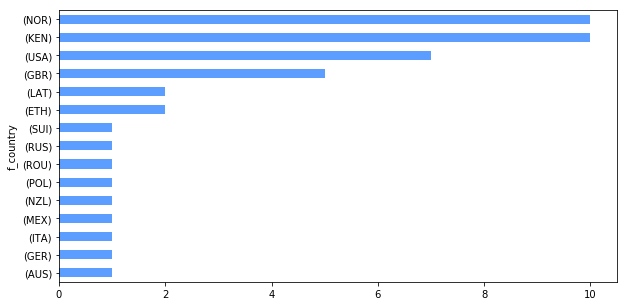

In [17]:
#WOMEN / per Countries / total Winners
df_marathon_ny.groupby('f_country')['f_winner'].count().sort_values(ascending=True).plot(color='#5B9EFF', figsize=(10,5), kind='barh')


In [18]:
#MEN / Countries per Winner
df_marathon_ny.groupby('m_winner')['m_country'].sum().sort_values(ascending=False)

m_winner
Bill Rodgers                 (USA)(USA)(USA)(USA)
Alberto Salazar                   (USA)(USA)(USA)
Tom Fleming                            (USA)(USA)
Sheldon Karlin                              (USA)
Gary Muhrcke                                (USA)
Norm Higgins                                (USA)
Norbert Sander                              (USA)
Mebrahtom Keflezighi                        (USA)
Juma Ikangaa                                (TAN)
Willie Mtolo                                (RSA)
Hendrick Ramaala                            (RSA)
Rod Dixon                                   (NZL)
Germán Silva                           (MEX)(MEX)
Andrés Espinosa                             (MEX)
Salvador García                             (MEX)
Abdelkader El Mouaziz                       (MAR)
Martin Kiptoo Lel                      (KEN)(KEN)
Geoffrey Kiprono Mutai                 (KEN)(KEN)
John Kagwe                             (KEN)(KEN)
Stanley Kipleting Biwott                 

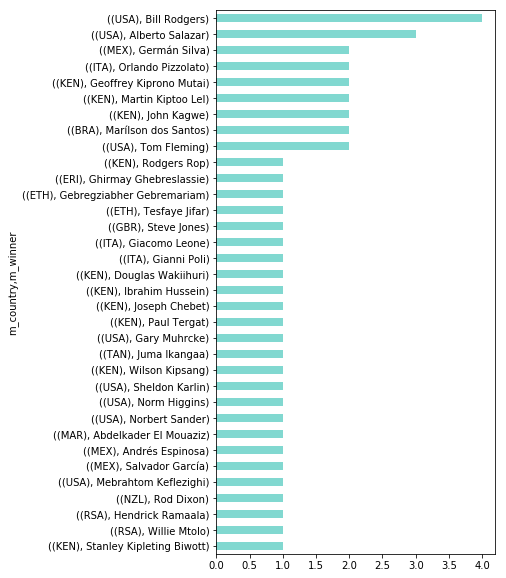

In [19]:
#MEN / per Winners / Countries
df_marathon_ny.groupby('m_country')['m_winner'].value_counts(ascending=True).sort_values().plot(color='#81D8D0', kind='barh', figsize=(5,10))

In [20]:
df_marathon_ny_finisher = df_marathon_ny[['m_finisher', 'f_finisher']]
df_marathon_ny_finisher.head()

,m_finisher,f_finisher
date,,
2016,NaN,NaN
2015,28899.0,20696.0
2014,30108.0,20422.0
2013,30699.0,19567.0
2012,NaN,NaN


# PART 3 – Women quota

**Boston**

In [215]:
Quota_Boston = pd.read_csv("Boston_Finisher_by_Gender_1897–2017.csv")
Quota_Boston.head()

,Year,Men,Women,Total
0,2017,14439,11975,26413
1,2016,14471,12168,26639
2,2015,14588,12022,26610
3,2014,17523,14282,31805
4,2013,10638,7942,17580


In [216]:
Quota_Boston.dtypes

Year     int64
Men      int64
Women    int64
Total    int64
dtype: object

In [217]:
Quota_Boston = Quota_Boston.set_index('Year')
Quota_Boston.head()

,Men,Women,Total
Year,,,
2017,14439,11975,26413
2016,14471,12168,26639
2015,14588,12022,26610
2014,17523,14282,31805
2013,10638,7942,17580


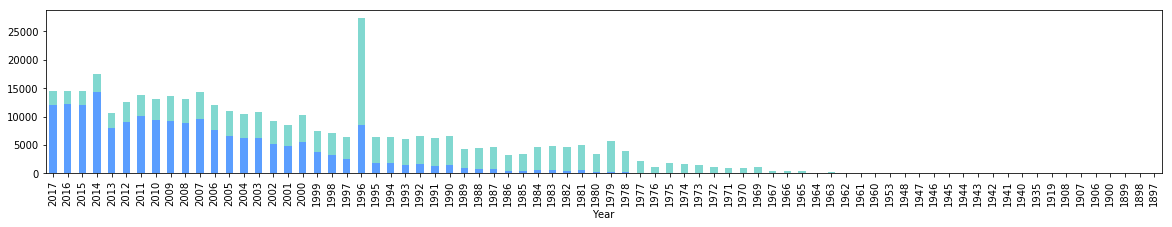

In [227]:
fig, ax = plt.subplots()

Quota_Boston['Men'].plot(color='#81D8D0', ax=ax, kind='bar', figsize=(20,3), label='men starter')
Quota_Boston['Women'].plot(color='#5B9EFF', ax=ax, kind='bar', figsize=(20,3), label='women starter')

#plt.savefig("marathon_Boston.pdf")

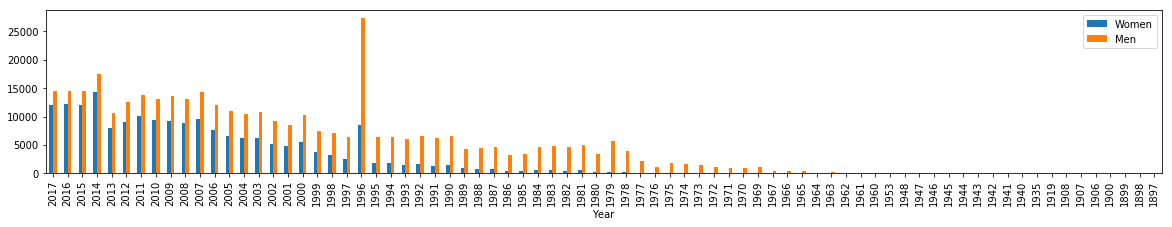

In [225]:
Quota_Boston[['Women', 'Men']].plot(kind='bar', figsize=(20,3))plt.savefig("Quota_Boston.pdf")
#plt.savefig("Absolute_Boston.pdf")

**Boston Quota** – percentage

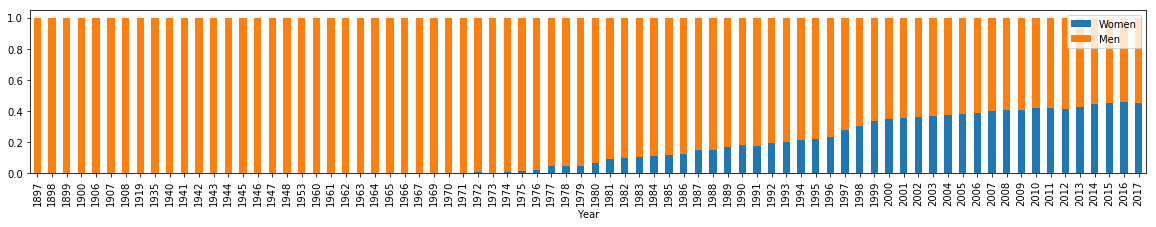

In [183]:
summed = Quota_Boston[['Women', 'Men']].divide(Quota_Boston[['Men', 'Women']].sum(axis=1), axis=0)
summed.plot(kind='bar', stacked=True, figsize=(20,3)).invert_xaxis()
#plt.savefig("Quota_Boston.pdf")

**New York**

In [228]:
Quota_New_York = pd.read_csv("NY_Finisher_by_Gender_1970-2016.csv")
Quota_New_York.head()

,Year,Men,Women,Total
0,2016,28899,20696,49595
1,2015,30108,20422,50530
2,2014,30699,19567,50266
3,2011,30068,17272,47340
4,2010,28948,16155,45103


In [229]:
Quota_New_York.dtypes

Year     int64
Men      int64
Women    int64
Total    int64
dtype: object

In [230]:
Quota_New_York = Quota_New_York.set_index('Year')
Quota_New_York.head()

,Men,Women,Total
Year,,,
2016,28899,20696,49595
2015,30108,20422,50530
2014,30699,19567,50266
2011,30068,17272,47340
2010,28948,16155,45103


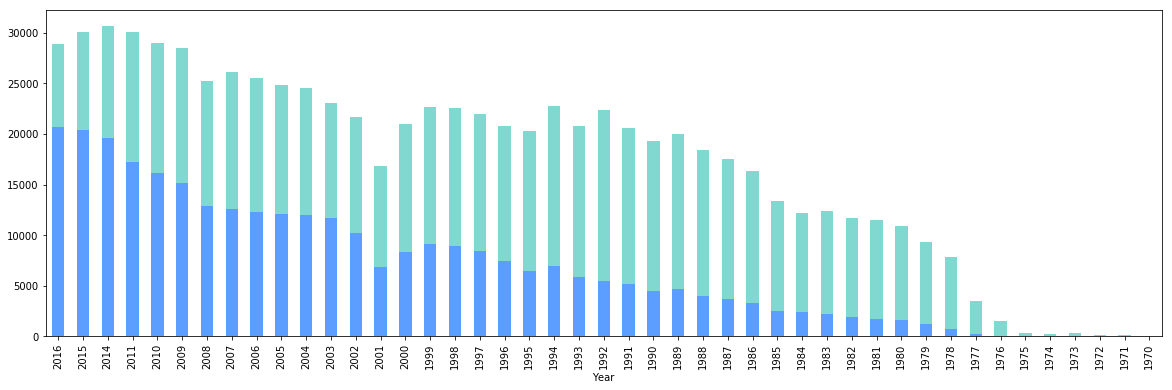

In [247]:
fig, ax = plt.subplots()

Quota_New_York['Men'].plot(color='#81D8D0', ax=ax, kind='bar', figsize=(20,6))
Quota_New_York['Women'].plot(color='#5B9EFF', ax=ax, kind='bar', figsize=(20,6))

plt.savefig("Absolute_New_York_.pdf")

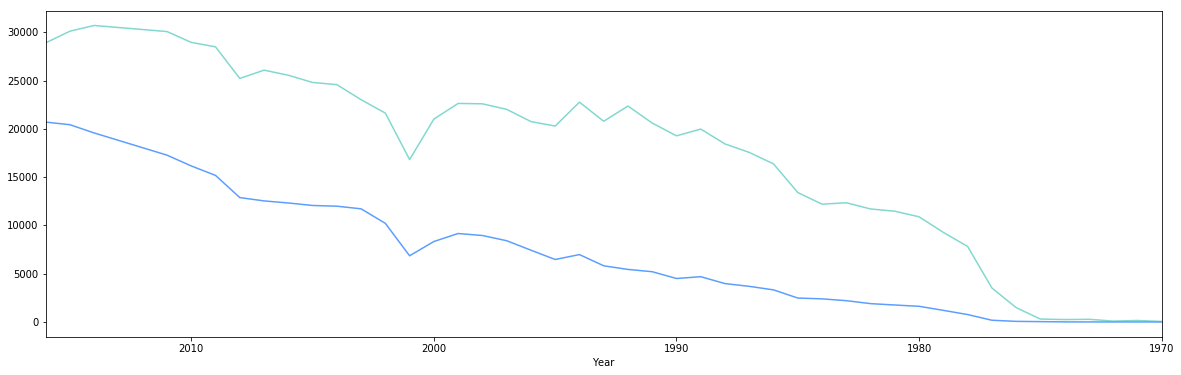

In [246]:
fig, ax = plt.subplots()

Quota_New_York['Men'].plot(color='#81D8D0', ax=ax, figsize=(20,6))
Quota_New_York['Women'].plot(color='#5B9EFF', ax=ax, figsize=(20,6))

#plt.savefig("Absolute_New_York_.pdf")

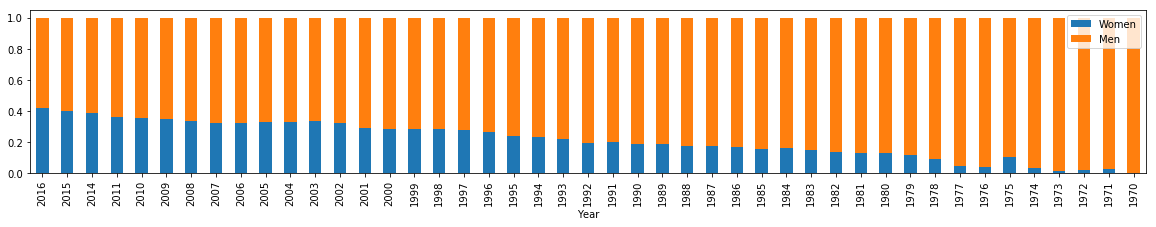

In [173]:
summed = Quota_New_York[['Women', 'Men']].divide(Quota_New_York[['Men', 'Women']].sum(axis=1), axis=0)
summed.plot(kind='bar', stacked=True, figsize=(20,3))#.invert_xaxis()
#plt.savefig("Quota_New_York_.pdf")

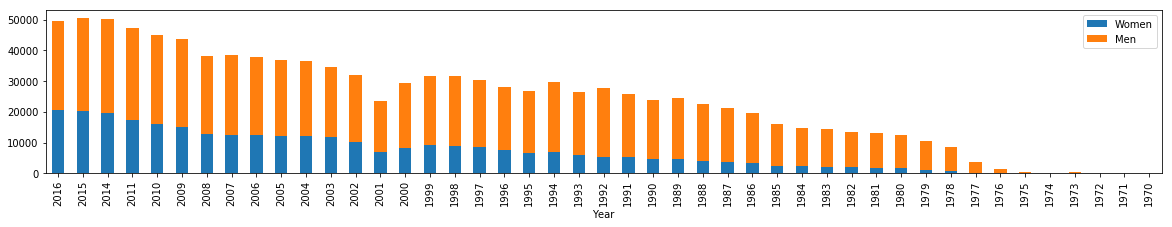

In [244]:
#summed = Quota_New_York[['Women', 'Men']].divide(Quota_New_York[['Men', 'Women']].sum(axis=1), axis=0)
Quota_New_York[['Women', 'Men']].plot(kind='bar', stacked=True, figsize=(20,3))#.invert_xaxis()
#plt.savefig("Quota_New_York_.pdf")

**Berlin**

In [234]:
Quota_Berlin = pd.read_csv("Berlin_Finisher_by_Gender_1974-2016.csv")
Quota_Berlin.head()

,Year,Men,Women,Total
0,2016,26807,9247,36054
1,2015,27897,8923,36820
2,2014,22209,6790,28999
3,2013,27549,8995,36544
4,2012,26450,7898,34348


In [235]:
Quota_Berlin.dtypes

Year     int64
Men      int64
Women    int64
Total    int64
dtype: object

In [236]:
Quota_Berlin = Quota_Berlin.set_index('Year')
Quota_Berlin.head()

,Men,Women,Total
Year,,,
2016,26807,9247,36054
2015,27897,8923,36820
2014,22209,6790,28999
2013,27549,8995,36544
2012,26450,7898,34348


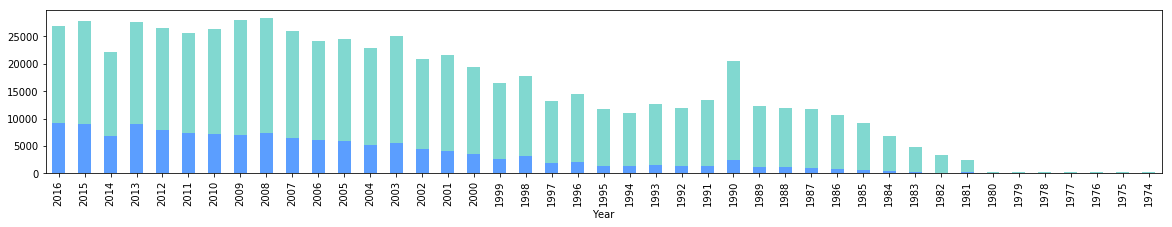

In [238]:
fig, ax = plt.subplots()

Quota_Berlin['Men'].plot(color='#81D8D0', ax=ax, kind='bar', figsize=(20,3), label='men starter')
Quota_Berlin['Women'].plot(color='#5B9EFF', ax=ax, kind='bar', figsize=(20,3), label='women starter')

#plt.savefig("Absolute_Berlin_.pdf")

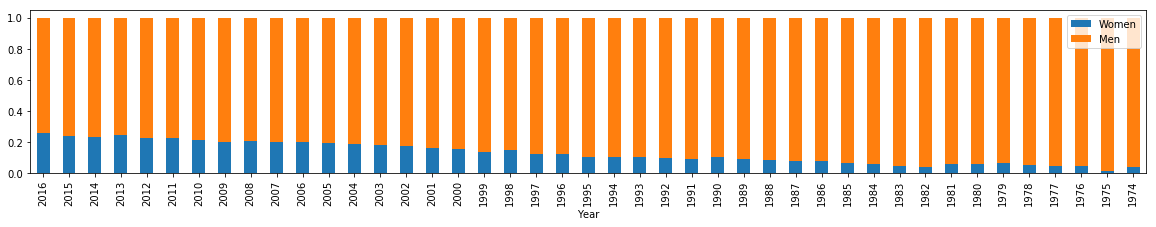

In [239]:
summed = Quota_Berlin[['Women', 'Men']].divide(Quota_Berlin[['Men', 'Women']].sum(axis=1), axis=0)
summed.plot(kind='bar', stacked=True, figsize=(20,3))#.invert_xaxis()
#plt.savefig("Quota_Berlin_.pdf")

# Finisher USA by gender

In [241]:
Quota_USA = pd.read_excel("statistic_id280440_share-of-marathon-finishers-in-the-united-states-by-gender-1980-2015.xlsx")
Quota_USA.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Statistic as Excel data file,NaN
1,NaN,Percentage of marathon finishers by gender in ...,NaN
2,NaN,Access data,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
